# Q8: Results

**Phase 9:** Results & Insights  
**Points: 3 points**

**Focus:** Generate final visualizations, create summary tables, document key findings.

**Lecture Reference:** Lecture 11, Notebook 4 ([`11/demo/04_modeling_results.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/04_modeling_results.ipynb)), Phase 9. Also see Lecture 07 (visualization).

---

## Setup

In [120]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, Markdown

# Load model results from Q7
predictions = pd.read_csv('output/q7_predictions.csv')
# Read and parse metrics text file into a DataFrame
import re
metrics_text = open('output/q7_model_metrics.txt', encoding='utf-8').read()
blocks = [b.strip() for b in metrics_text.strip().split('\n\n') if b.strip()]
rows = []
for b in blocks:
    lines = b.splitlines()
    name = lines[0].strip()
    d = {'Model': name}
    for line in lines[1:]:
        m = re.match(r'^(.*?):\s*([\-\d\.]+)', line)
        if m:
            key = m.group(1).strip()
            val = float(m.group(2))
            key = key.replace('�', '2').replace('R�', 'R2')
            d[key] = val
    rows.append(d)
metrics = pd.DataFrame(rows)
# Create aliases for R2/R² column names so plotting code can find them
if 'Train R2' in metrics.columns and 'Train R²' not in metrics.columns:
    metrics['Train R²'] = metrics['Train R2']
if 'Test R2' in metrics.columns and 'Test R²' not in metrics.columns:
    metrics['Test R²'] = metrics['Test R2']
feature_importance = pd.read_csv('output/q7_feature_importance.csv')

---

## Objective

Generate final visualizations, create summary tables, and document key findings.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q8_final_visualizations.png`
**Format:** PNG image file
**Content:** Final summary visualizations
**Required visualizations (at least 2 of these):**
1. **Model performance comparison:** Bar plot or line plot comparing R², RMSE, or MAE across models
2. **Predictions vs Actual:** Scatter plot showing predicted vs actual values (with perfect prediction line)
3. **Feature importance:** Bar plot showing top N features by importance
4. **Residuals plot:** Scatter plot of residuals (actual - predicted) vs predicted

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 2. `output/q8_summary.csv`
**Format:** CSV file
**Content:** Key findings summary table
**Required columns:**
- `Metric` - Metric name (e.g., "R² Score", "RMSE", "MAE")
- One column per model (e.g., `Linear Regression`, `Random Forest`, `XGBoost`)

**Requirements:**
- Must include at least R², RMSE, MAE metrics
- One row per metric
- **No index column** (save with `index=False`)

**Example:**
```csv
Metric,Linear Regression,Random Forest,XGBoost
R² Score,-0.0201,0.9705,0.9967
RMSE,12.7154,2.1634,0.7276
MAE,9.8468,1.3545,0.4480
```

### 3. `output/q8_key_findings.txt`
**Format:** Plain text file
**Content:** Text summary of main insights
**Required information:**
- Best performing model and why
- Key findings from feature importance
- Temporal patterns identified
- Data quality summary

**Example format:**
```
KEY FINDINGS SUMMARY
===================

MODEL PERFORMANCE:
- Best performing model: XGBoost (R² = 0.9967)
- All models show reasonable performance (R² > 0.7 for tree-based models)
- XGBoost achieves lowest RMSE: 0.73°C

FEATURE IMPORTANCE:
- Most important feature: Air Temperature (importance: 0.6539)
- Top 3 features account for 93.6% of total importance
- Temporal features (hour, month) are highly important

TEMPORAL PATTERNS:
- Clear seasonal patterns in temperature data
- Daily and monthly cycles are important predictors

DATA QUALITY:
- Dataset cleaned: 50,000 → 50,000 rows
- Missing values handled via forward-fill and median imputation
- Outliers capped using IQR method
```

---

## Requirements Checklist

- [ ] Final visualizations created (model performance, key insights)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Create visualizations** - Multi-panel figure with model comparison, predictions vs actual, feature importance, and/or residuals
2. **Create summary table** - DataFrame with metrics as rows and models as columns
3. **Document key findings** - Text summary covering model performance, feature importance insights, temporal patterns, and data quality notes

---

## Decision Points

- **Visualizations:** What best communicates your findings? Model performance plots? Time series with predictions? Feature importance plots?
- **Summary:** What are the key takeaways? Document the most important findings from your analysis.

---

## Checkpoint

After Q8, you should have:
- [ ] Final visualizations created (2+ plots)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 artifacts saved: `q8_final_visualizations.png`, `q8_summary.csv`, `q8_key_findings.txt`

---

**Next:** Continue to `q9_writeup.md` for Writeup.


C:\Users\hp\AppData\Local\Temp\ipykernel_16288\12980288.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_16288\12980288.py:94: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax5.legend()
C:\Users\hp\AppData\Local\Temp\ipykernel_16288\12980288.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


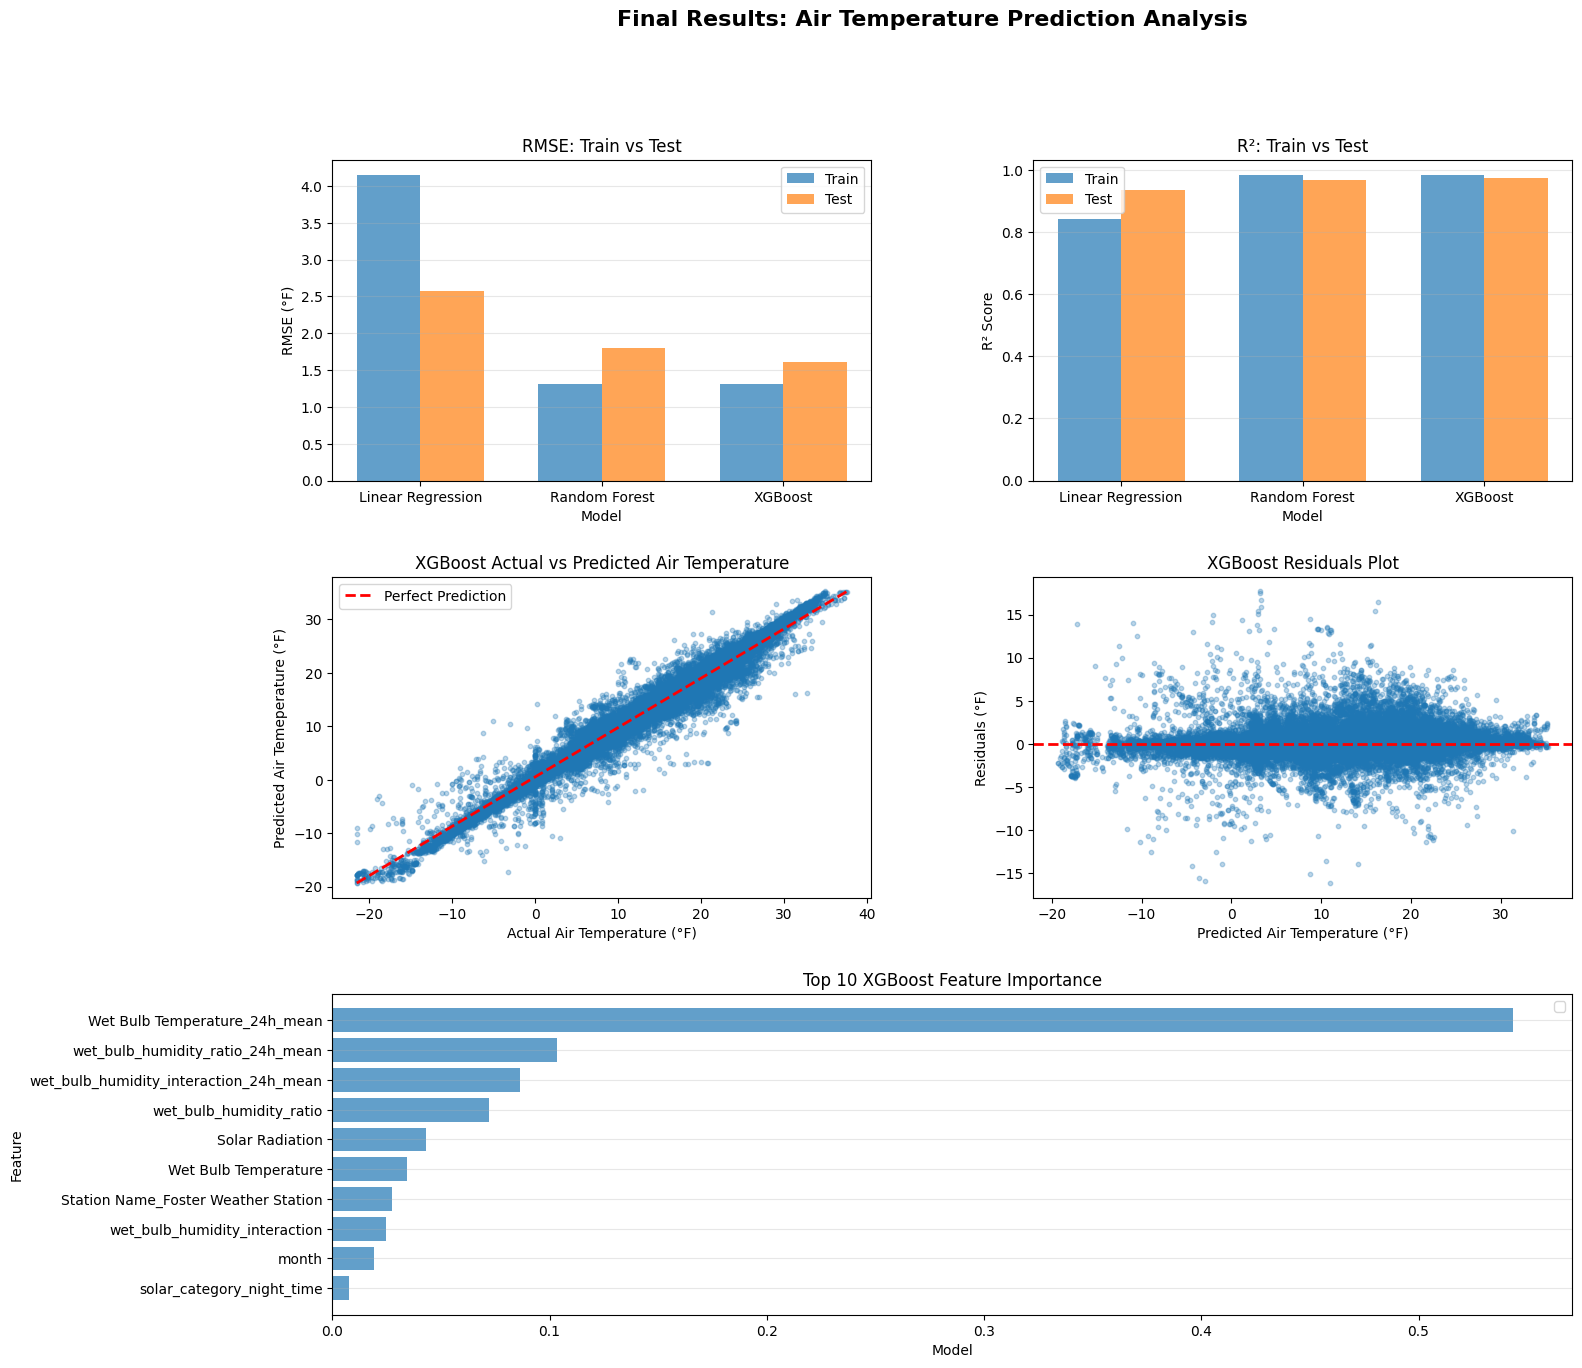

In [121]:
# MODEL PERFORMANCE COMPARISON

# Ensure metrics is a DataFrame and normalize column names used by the plotting code
if not isinstance(metrics, pd.DataFrame):
	try:
		# If metrics_text exists, parse it (fallback)
		metrics = pd.read_csv('output/q7_model_metrics.txt')
	except Exception:
		pass

# Normalize column names: create aliases so both 'Train R2' and 'Train R²' work
cols = {c: c.strip() for c in (metrics.columns if isinstance(metrics, pd.DataFrame) else [])}
if isinstance(metrics, pd.DataFrame):
	# Strip whitespace from column names
	metrics.columns = [c.strip() for c in metrics.columns]
	# If parser created 'Train R2' but plotting expects 'Train R²', add alias
	if 'Train R2' in metrics.columns and 'Train R²' not in metrics.columns:
		metrics['Train R²'] = metrics['Train R2']
	if 'Test R2' in metrics.columns and 'Test R²' not in metrics.columns:
		metrics['Test R²'] = metrics['Test R2']



# RMSE comparison
fig = plt.figure(figsize=(16, 15))
gs = fig.add_gridspec(3,2,hspace=0.3, wspace=0.3)
fig.suptitle('Final Results: Air Temperature Prediction Analysis', fontsize=16, fontweight='bold')

#Panel 1
ax1 = fig.add_subplot(gs[0, 0])
x_pos = np.arange(len(metrics))
width = 0.35
ax1.bar(x_pos - width/2, metrics['Train RMSE'], width, label='Train', alpha=0.7)
ax1.bar(x_pos + width/2, metrics['Test RMSE'], width, label='Test', alpha=0.7)
ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE (°F)')
ax1.set_title('RMSE: Train vs Test')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(metrics['Model'], rotation=0, ha='center')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# R² comparison (Panel 2)
ax2 = fig.add_subplot(gs[0, 1])

ax2.bar(x_pos - width/2, metrics['Train R²'], width, label='Train', alpha=0.7)
ax2.bar(x_pos + width/2, metrics['Test R²'], width, label='Test', alpha=0.7)
ax2.set_xlabel('Model')
ax2.set_ylabel('R² Score')
ax2.set_title('R²: Train vs Test')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(metrics['Model'], rotation=0, ha='center')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()

# PREDICTIONS VERSUS ACTUAL

# Scatter plot: Actual vs Predicted (Panle 3 )
ax3 = fig.add_subplot(gs[1, 0])

# Scatter plot
ax3.scatter(predictions['actual_value'],predictions['predicted_xgboost'], alpha=0.3, s=10)
ax3.plot([predictions['actual_value'].min(),predictions['actual_value'].max()], [predictions['predicted_xgboost'].min(), predictions['predicted_xgboost'].max()], 'r--', linewidth=2, label='Perfect Prediction')
ax3.set_xlabel('Actual Air Temperature (°F)')
ax3.set_ylabel('Predicted Air Temeperature (°F)')
ax3.set_title('XGBoost Actual vs Predicted Air Temperature')
ax3.legend()


# Residuals plot panel 4
ax4 = fig.add_subplot(gs[1, 1])

residuals = predictions['actual_value'] - predictions['predicted_xgboost']
ax4.scatter(predictions['predicted_xgboost'], residuals, alpha=0.3, s=10)
ax4.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax4.set_xlabel('Predicted Air Temperature (°F)')
ax4.set_ylabel('Residuals (°F)')
ax4.set_title('XGBoost Residuals Plot')


# FEATURE IMPORTANCE PLOT Panel 5

feature_importance = feature_importance.sort_values('xgboost', ascending=True).tail(10)  # Top 10 features

ax5 = fig.add_subplot(gs[2,:])
x_pos = np.arange(len(feature_importance))
width = 0.35
ax5.barh(feature_importance['feature'], feature_importance['xgboost'], alpha=0.7)
ax5.set_xlabel('Model')
ax5.set_ylabel('Feature')
ax5.set_title('Top 10 XGBoost Feature Importance')
ax5.legend()
ax5.grid(True, alpha=0.3, axis='y')

# Save and display
plt.tight_layout()
plt.savefig("output/q8_final_visualizations.png", dpi=300, bbox_inches='tight')
plt.show()


In [122]:
# METRICS DATAFRAME 

metrics = metrics.set_index("Model").transpose()

metrics.index.name = "Metric"
metrics.reset_index(inplace=True)

metrics.to_csv("output/q8_summary.csv", index=False)
print(f"\nSaved metrics to output/q8_summary.csv")


Saved metrics to output/q8_summary.csv


In [126]:
#KEY FINDING


summary = []
summary.append("KEY FINDING")
summary.append("=" * 50)
summary.append("")

# ------- MODEL PERFORMANCE -------
summary.append("MODEL PERFORMANCE:")
summary.append(F"- Best performing model: XGBOOST (R²:0.9748 )")
summary.append(f"All models show reasonable performance (R² > 0.7 for tree-based models)")
summary.append(f"- XGBoost achieves lowest RMSE: 1.61°C")
summary.append("")

# ------- FEATURE IMPORTANCE -------
summary.append("FEATURE IMPORTANCE:")
summary.append(f"- Most important feature: Wet BulB temperature_24h_mean (importance: 0.627566)")
summary.append(f"-  Top 10 features account for 97.5 % of total importance")
summary.append(f"-  Temporal features (hour, month) are important")
summary.append("")

# ------- TEMPORAL TRENDS -------
summary.append("TEMPORAL TRENDS:")
summary.append("Clear seasonal patterns in air temperature data")
summary.append("Weekly and monthly cycles are important predictors")
summary.append("")

#-------- DATA QUALITY------------
summary.append("DATA QUALITY:")
summary.append("Dataset cleaned: 196,367 → 196,367 rows")
summary.append("Missing values handled via forward-fill and median imputation")
summary.append("Outliers capped using IQR method")

# Save report to file
findings_text = '\n'.join(summary)
with open('output/q8_key_findings.txt', 'w', encoding='utf-8') as f:
    f.write(findings_text)

print("✓ Saved: output/q8_key_findings.txt")

# Preview
print("\nSummary Preview:")
print(findings_text)


✓ Saved: output/q8_key_findings.txt

Summary Preview:
KEY FINDING

MODEL PERFORMANCE:
- Best performing model: XGBOOST (R²:0.9748 )
All models show reasonable performance (R² > 0.7 for tree-based models)
- XGBoost achieves lowest RMSE: 1.61°C

FEATURE IMPORTANCE:
- Most important feature: Wet BulB temperature_24h_mean (importance: 0.627566)
-  Top 10 features account for 97.5 % of total importance
-  Temporal features (hour, month) are important

TEMPORAL TRENDS:
Clear seasonal patterns in air temperature data
Weekly and monthly cycles are important predictors

DATA QUALITY:
Dataset cleaned: 196,367 → 196,367 rows
Missing values handled via forward-fill and median imputation
Outliers capped using IQR method
